<a href="https://colab.research.google.com/github/arslanlatifawan/Python_Projects/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  DrugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  DrugY
9   43   M     LOW      NORMAL   19.368  DrugY
X.columns: Index(['Age', 'Na_to_K'], dtype='object')
y.unique(): ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


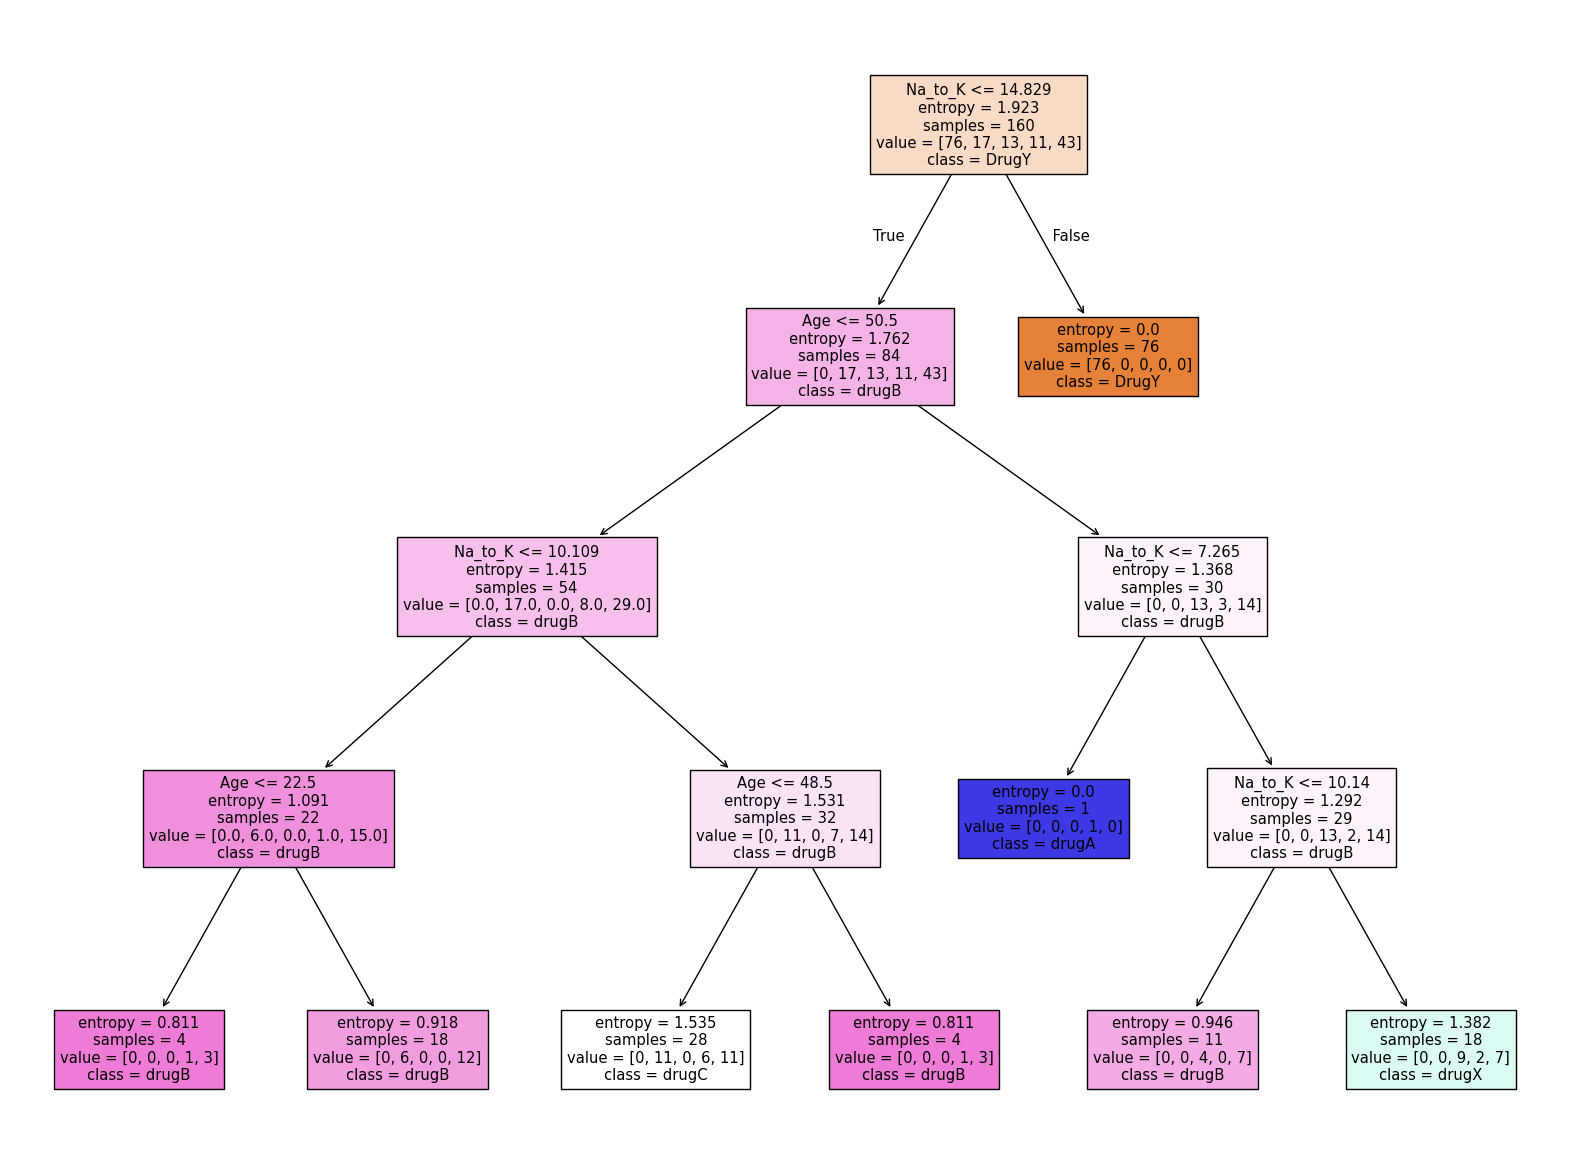

Confusion Matrix:
 [[15  0  0  0  0]
 [ 0  5  0  0  1]
 [ 0  0  2  0  1]
 [ 0  1  1  0  3]
 [ 0  4  2  1  4]]

Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugC       0.50      0.83      0.62         6
       drugX       0.40      0.67      0.50         3
       drugA       0.00      0.00      0.00         5
       drugB       0.44      0.36      0.40        11

    accuracy                           0.65        40
   macro avg       0.47      0.57      0.51        40
weighted avg       0.60      0.65      0.62        40


Accuracy Score: 0.65


In [3]:
#Apply decision tree to given dataset csv file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path1 = '/content/drive/My Drive/Colab Notebooks/Datasets/drug200.csv'
data = pd.read_csv(file_path1)
df = pd.DataFrame(data)
print(df.head(10))

X = df[['Age', 'Na_to_K']]
y = df['Drug']
print("X.columns:", X.columns)
print("y.unique():", y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names = X.columns, class_names = y.unique(), filled=True)
plt.show()

y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y.unique()))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Mounted at /content/drive
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  DrugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  DrugY
9   43   M     LOW      NORMAL   19.368  DrugY


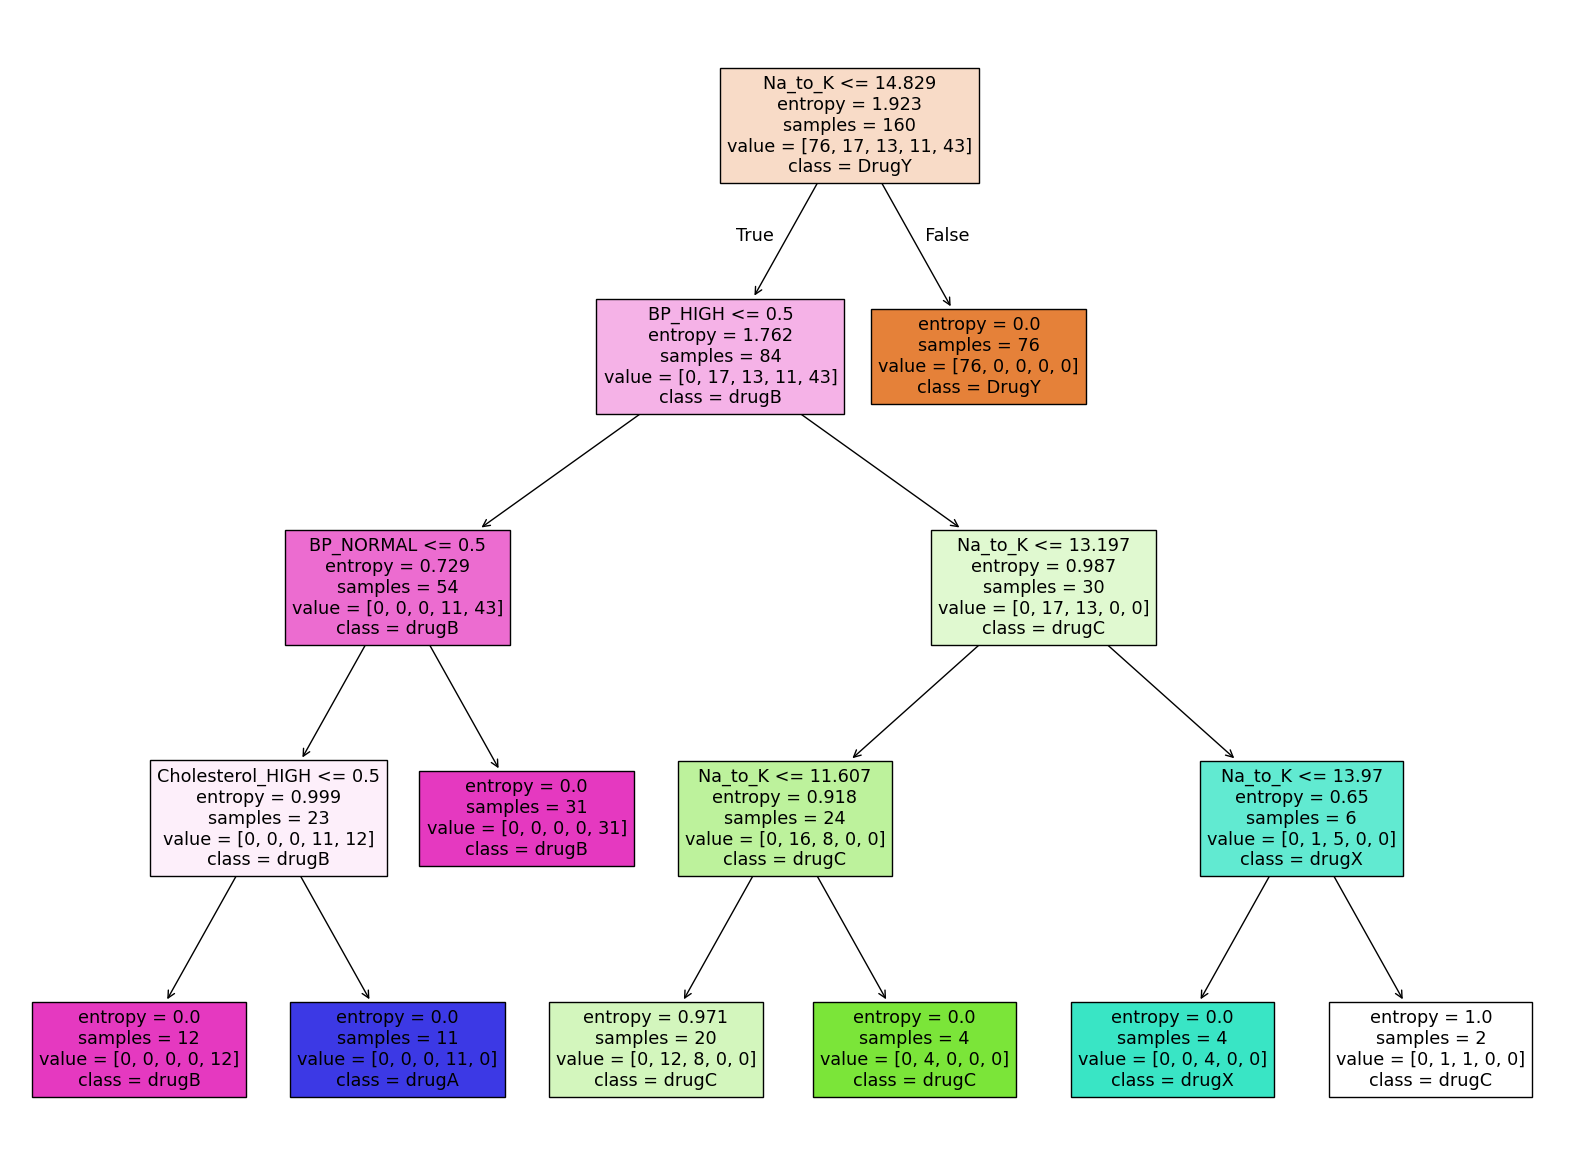

Confusion Matrix:
 [[15  0  0  0  0]
 [ 0  5  1  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]

Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugC       0.62      0.83      0.71         6
       drugX       0.00      0.00      0.00         3
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.72      0.77      0.74        40
weighted avg       0.87      0.90      0.88        40


Accuracy Score: 0.9


In [1]:
#Apply decision tree to given dataset csv file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

drive.mount('/content/drive', force_remount=True)
file_path1 = '/content/drive/My Drive/Colab Notebooks/Datasets/drug200.csv'
data = pd.read_csv(file_path1)
df = pd.DataFrame(data)
print(df.head(10))

X = df[['BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Identify categorical and numerical features
categorical_features = ['BP', 'Cholesterol']
numerical_features = ['Na_to_K']

# Create a column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough' # Keep numerical features as they are
)

# Create a pipeline that first preprocesses the data and then applies the decision tree
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=4))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,15))

# To plot the tree, we need the feature names after one-hot encoding.
# This is a bit more complex with a pipeline. For simplicity in plotting,
# let's fit the preprocessor separately to get the feature names.
preprocessor.fit(X)
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
all_feature_names = encoded_feature_names + numerical_features

plot_tree(clf.named_steps['classifier'], feature_names = all_feature_names, class_names = y.unique(), filled=True)
plt.show()


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y.unique()))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Characteristics of drugC:


,Age,Na_to_K
count,16.00000,16.000000
mean,42.50000,10.633750
std,16.72523,2.045009
min,16.00000,6.769000
25%,27.50000,9.978250
50%,47.00000,10.490500
75%,50.75000,11.826750
max,72.00000,14.160000



Characteristics of drugX:


,Age,Na_to_K
count,54.000000,54.000000
mean,44.018519,10.650556
std,16.435685,2.198091
min,15.000000,6.683000
25%,32.000000,8.997000
50%,45.000000,10.524000
75%,56.750000,12.286250
max,74.000000,14.642000


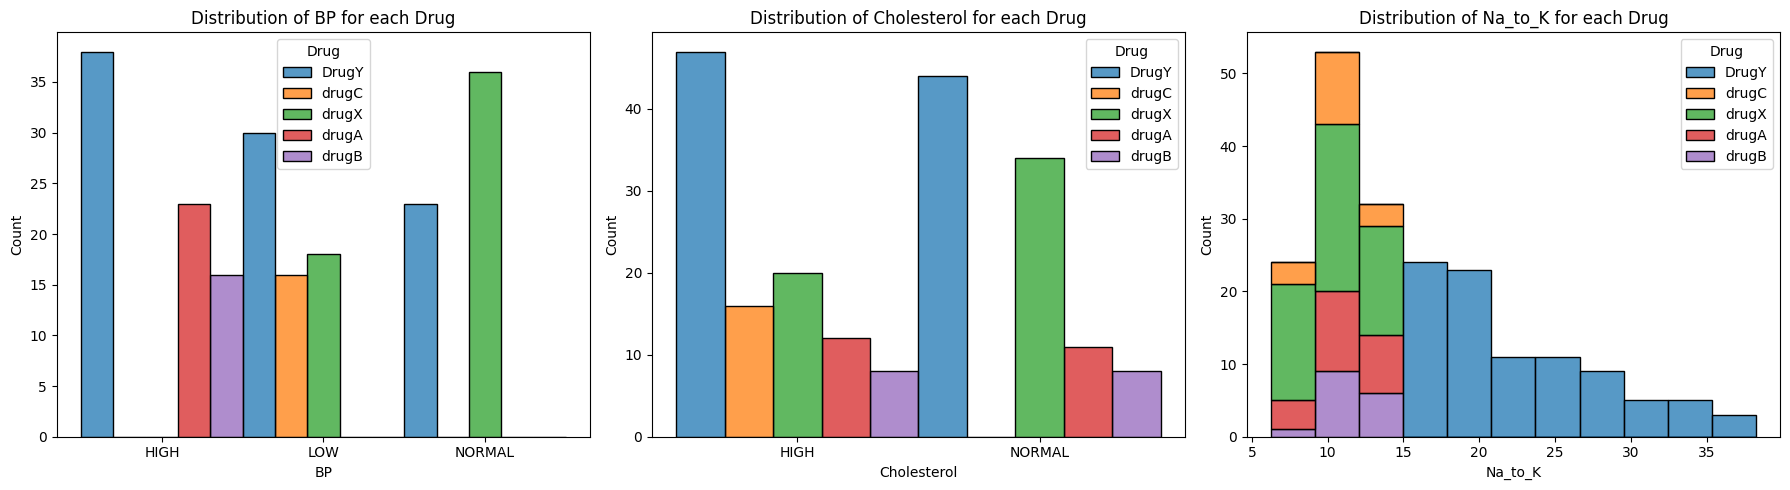

In [2]:
# Filter the DataFrame for drugC and drugX
drugC_df = df[df['Drug'] == 'drugC']
drugX_df = df[df['Drug'] == 'drugX']

print("Characteristics of drugC:")
display(drugC_df.describe())

print("\nCharacteristics of drugX:")
display(drugX_df.describe())

# You can also visualize the distribution of features for these classes
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='BP', hue='Drug', multiple='dodge', ax=axes[0])
axes[0].set_title('Distribution of BP for each Drug')

sns.histplot(data=df, x='Cholesterol', hue='Drug', multiple='dodge', ax=axes[1])
axes[1].set_title('Distribution of Cholesterol for each Drug')

sns.histplot(data=df, x='Na_to_K', hue='Drug', multiple='stack', ax=axes[2])
axes[2].set_title('Distribution of Na_to_K for each Drug')

plt.tight_layout()
plt.show()